# Subroutine 1
Generate points based on the labels (taken as an input from the GUI)
structure of the point:
    (t0, vel, flag (1=hyperbolic, 0=linear), label)

In [5]:
import random
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline


def points_gen(nDA,nR,nCN):
    # The function generates random values of t0 - velocity pairs
    # based on number of requested waves:
    # nDA - number of direct waves (linear moveout, label 'D')
    # nR - number of reflections (hyperbolic moveout, label 'R')
    # nCN - number of coherent noise events (linear moveout, label 'N')
    # outputs (nDA+nR+nCN) * (4) list
    # each point in the list has the following structure
    # [t0 (intercept time), velocity, flag(1=hyperbolic, 0=linear), label(see above))]
    
    
    # direct arrival
    direct = []
    n = 1
    while (n <= nDA):
        direct.append([0,random.uniform(.5,1.5),0,'D'])
        n = n+1
    
    n = 1
    reflected = []
    while (n <= nR):
        reflected.append([random.uniform(0,4),random.uniform(1.5,5),1,'R'])
        n = n+1
        
    n = 1
    noise = []
    while (n <= nCN):
        noise.append([random.uniform(-2,2),random.uniform(-3,3),0,'N'])
        n = n+1
        
    events = direct + reflected + noise
    return events

In [6]:
def points_plot(events):
    x = [x/1000 for x in range(0,2000,25)]
    
    fig, ax = plt.subplots()
    
    # plot waves
    for i in events:
        if i[3] == 'D':
            y = [offset/i[1] for offset in x]
            ax.plot(x,y,'r')
        if i[3] == 'N':
            ax.plot(x,[i[0]+offset/i[1] for offset in x],'b')
        if i[3] == 'R':
            ax.plot(x,[np.sqrt(i[0]**2 + offset**2 / i[1]**2) for offset in x],'g')
    
    plt.ylabel('Time, s')
    plt.xlabel('Offset, km')
    ax.set_xlim([0,2])
    ax.set_ylim([0,4])
    ax.invert_yaxis()
    ax.set_aspect(1)
    return ax

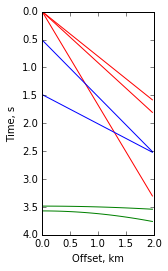

In [7]:
events=points_gen(3,2,3)
ax = points_plot(events)
plt.show(ax)

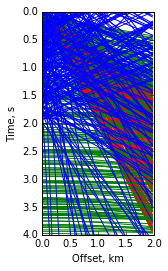

In [8]:
events2=points_gen(300,200,300)
ax2 = points_plot(events2)
plt.show(ax2)

In [9]:
events2

[[0, 1.4345012507294728, 0, 'D'],
 [0, 1.0065202738710413, 0, 'D'],
 [0, 1.034264322132089, 0, 'D'],
 [0, 0.789346505408732, 0, 'D'],
 [0, 0.9756037786949299, 0, 'D'],
 [0, 1.0634761670962036, 0, 'D'],
 [0, 0.93174246332528, 0, 'D'],
 [0, 1.34143120140966, 0, 'D'],
 [0, 0.8367277091332166, 0, 'D'],
 [0, 0.8313291932966849, 0, 'D'],
 [0, 1.26129363752101, 0, 'D'],
 [0, 1.3660728444464687, 0, 'D'],
 [0, 0.9330398532657141, 0, 'D'],
 [0, 1.4152828692664075, 0, 'D'],
 [0, 1.1223970064565971, 0, 'D'],
 [0, 0.5408636948898912, 0, 'D'],
 [0, 1.4832774988342567, 0, 'D'],
 [0, 1.2764333799198042, 0, 'D'],
 [0, 1.4966685436916212, 0, 'D'],
 [0, 0.9371720756261709, 0, 'D'],
 [0, 0.9349493996484021, 0, 'D'],
 [0, 0.8855053216991876, 0, 'D'],
 [0, 0.7620431492952672, 0, 'D'],
 [0, 0.9721386870251705, 0, 'D'],
 [0, 0.9844509094820493, 0, 'D'],
 [0, 0.9323790921991194, 0, 'D'],
 [0, 0.7411758901277611, 0, 'D'],
 [0, 1.4320202259775043, 0, 'D'],
 [0, 1.1230351034239594, 0, 'D'],
 [0, 1.204923038147012

In [10]:
events

[[0, 1.2487372702739918, 0, 'D'],
 [0, 0.5977853705376456, 0, 'D'],
 [0, 1.0932071822730618, 0, 'D'],
 [3.57189135836039, 1.6769882145859862, 1, 'R'],
 [3.4858435152202687, 3.1512057252977366, 1, 'R'],
 [1.4875990000737245, 1.9111051934959136, 0, 'N'],
 [-1.188272307386848, -1.291729598246055, 0, 'N'],
 [0.5098052909171513, 0.9873935926646955, 0, 'N']]

In [11]:
events[0]

[0, 1.2487372702739918, 0, 'D']

In [12]:
events[0][0]

0

In [13]:
def makeEventsDict(events):
    eventsDict = {}
    labelsDict = {}
    # direct arrival
    labelsDict['label'] = []
    eventsDict['direct'], eventsDict['reflected'], eventsDict['coherentnoise'] = [],[],[]
    eventsDict['events'] = []
    for each in events:
#         print(each)
#         print(each[0])
#         print(each[3])
#         eventsDict['direct'].append(each[0])
#         eventsDict['reflected'].append(each[1])
#         eventsDict['coherentnoise'].append(each[2])
         eventsDict['events'].append(each[0:3])
         labelsDict['label'].append(each[3])
    return(eventsDict,labelsDict)




In [14]:
testEvents = makeEventsDict(events)
print(testEvents)

({'events': [[0, 1.2487372702739918, 0], [0, 0.5977853705376456, 0], [0, 1.0932071822730618, 0], [3.57189135836039, 1.6769882145859862, 1], [3.4858435152202687, 3.1512057252977366, 1], [1.4875990000737245, 1.9111051934959136, 0], [-1.188272307386848, -1.291729598246055, 0], [0.5098052909171513, 0.9873935926646955, 0]], 'reflected': [], 'direct': [], 'coherentnoise': []}, {'label': ['D', 'D', 'D', 'R', 'R', 'N', 'N', 'N']})


In [15]:
eventsDict = testEvents[0]
labelsDict = testEvents[1]

In [16]:
from sklearn import svm

In [17]:
from sklearn import svm
SVC = svm.SVC()
import matplotlib.pyplot as plt

In [18]:
# X = [[0, 0], [1, 1]]
# y = [0, 1]
# clf = svm.SVC()
# clf.fit(X, y)  
X = eventsDict['events']
print("X = ",X)
y = labelsDict['label']
print("y = ",y)
clf = svm.SVC()
clf.fit(X, y) 

X =  [[0, 1.2487372702739918, 0], [0, 0.5977853705376456, 0], [0, 1.0932071822730618, 0], [3.57189135836039, 1.6769882145859862, 1], [3.4858435152202687, 3.1512057252977366, 1], [1.4875990000737245, 1.9111051934959136, 0], [-1.188272307386848, -1.291729598246055, 0], [0.5098052909171513, 0.9873935926646955, 0]]
y =  ['D', 'D', 'D', 'R', 'R', 'N', 'N', 'N']


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
clf.predict([[0,1.34,0]])

array(['D'], 
      dtype='<U1')

#### SUCCESS !! really really easy success, but at least it didn't do anything obviously wrong!

In [20]:
# get support vectors
clf.support_vectors_

array([[ 0.        ,  1.24873727,  0.        ],
       [ 0.        ,  0.59778537,  0.        ],
       [ 0.        ,  1.09320718,  0.        ],
       [ 1.487599  ,  1.91110519,  0.        ],
       [-1.18827231, -1.2917296 ,  0.        ],
       [ 0.50980529,  0.98739359,  0.        ],
       [ 3.57189136,  1.67698821,  1.        ],
       [ 3.48584352,  3.15120573,  1.        ]])

In [21]:
# get indices of support vectors
clf.support_ 

array([0, 1, 2, 5, 6, 7, 3, 4], dtype=int32)

In [22]:
# get number of support vectors for each class
clf.n_support_ 

array([3, 3, 2], dtype=int32)

In [23]:
# This function combines several of the smaller lines above
# It takes a events list, turns it into two dictionaries combined, splits that into two arrays for X and Y
# trains a SVM label on them and then returns that model output details
# The model will need to be run on a input for a prediction

def comboFunctionA(events):
    testEvents = makeEventsDict(events)
    eventsDict = testEvents[0]
    labelsDict = testEvents[1]
    X = eventsDict['events']
#     print("X = ",X)
    y = labelsDict['label']
#     print("y = ",y)
    clf = svm.SVC()
    output = clf.fit(X, y)
    return(output)
    

In [24]:
# runs the function above and make a prediction
tempAnswer = comboFunctionA(events2)
tempAnswer

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [25]:
events2Model = tempAnswer

In [34]:
# requests a prediction from the model
clf.predict([[0,1.34,0],[0,1.4,0.2]])

array(['D', 'D'], 
      dtype='<U1')

In [27]:
# requests a prediction from the model
clf.predict([[-1.190348857444183, -0.8156719314845455, 0]])

array(['N'], 
      dtype='<U1')

Both of the two predictions above were correct

In [28]:
## events2Model = tempAnswer = comboFunctionA(events2)

def testUnseenEvents__OLD(model,eventsDict):
    score = {}
    score['result'] = []
    score['test'] = []
    score['isCorrect'] = []
    x = 0
    print(eventsDict)
    for each in (eventsDict):
#         print("each",each)
#         print("each['events']" each['events'])
        prediction = model.predict(each['events'])
        print("prediction",prediction)
        print("labelsDict",eventsDict)
        print(eventsDict['label'])
        if prediction == eventsDict['label'][x]:
            isCorrect = "True"
        else:
            isCorrect = "False"
#         print(prediction == eventsDict['label']:
        score['result'].append(prediction)
        score['test'].append(each)
        score['isCorrect'].append(isCorrect)
        x = x + 1
    return(score)  

In [145]:

#
def testUnseenEvents(model,eventsDict):
    score = {}
    score['result'] = []
    score['test'] = []
    score['isCorrect'] = []
    x = 0
#     eventsTest_eventsDict = eventsDict[0]['events']
#     eventsTest_labelsDict = eventsDict[1]['label']
    i = 0
    while i < len(eventsDict[0]['events']):
        each = i
#         print("each",each)
        eventsTest_eventsDict = eventsDict[0]['events']
        eventsTest_labelsDict = eventsDict[1]['label']
#         print("eventsTest_eventsDict",eventsTest_eventsDict)
#         print("eventsTest_labelsDict",eventsTest_labelsDict)
#         print("eventsTest_eventsDict[i]",eventsTest_eventsDict[i])
#         print("eventsTest_labelsDict[i]",eventsTest_labelsDict[i])
        prediction = model.predict(eventsTest_eventsDict[i])
        if prediction == eventsDict[1]['label'][i]:
            isCorrect = "True"
        else:
            isCorrect = "False"
        score['result'].append(prediction)
        score['test'].append(each)
        score['isCorrect'].append(isCorrect)
        i += 1
    return(score)  

In [146]:
events3=points_gen(300,200,300)

In [147]:
events3_testEvents = makeEventsDict(events3)
events3_eventsDict = testEvents[0]
events3_labelsDict = testEvents[1]

In [148]:
# events3Model = comboFunctionA(events2)

In [149]:
answer = testUnseenEvents(events2Model,events3_testEvents)
answer

/Users/justingosses/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/justingosses/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/justingosses/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it c

{'isCorrect': ['True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True

In [152]:
import pprint

In [153]:
pprint.pprint(dict(answer), width=1)

{'isCorrect': ['True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
               'True',
           

In [154]:
def printTable(myDict, colList=None):
   """ Pretty print a list of dictionaries (myDict) as a dynamically sized table.
   If column names (colList) aren't specified, they will show in random order.
   Author: Thierry Husson - Use it as you want but don't blame me.
   """
   if not colList: colList = list(myDict[0].keys() if myDict else [])
   myList = [colList] # 1st row = header
   for item in myDict: myList.append([str(item[col] or '') for col in colList])
   colSize = [max(map(len,col)) for col in zip(*myList)]
   formatStr = ' | '.join(["{{:<{}}}".format(i) for i in colSize])
   myList.insert(1, ['-' * i for i in colSize]) # Seperating line
   for item in myList: print(formatStr.format(*item))

In [159]:
events3_pred = dict(answer)
printTable(answer,colList=['test','result','isCorrect'])

TypeError: string indices must be integers

In [161]:
answer

{'isCorrect': ['True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True',
  'True

In [163]:
print('events3_pred_results')
for test, isCorrect in answer.items():
    print('{} {}'.format(test, isCorrect))

events3_pred_results
test [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216